# ALIKED DEMO

In [2]:
import torch
print(torch.cuda.is_available())

True


In [1]:
# 1. Clonar repositorio

!git clone https://github.com/Shiaoming/ALIKED.git
%cd ALIKED

Cloning into 'ALIKED'...
remote: Enumerating objects: 113, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 113 (delta 6), reused 5 (delta 4), pack-reused 100 (from 1)
Receiving objects: 100% (113/113), 39.51 MiB | 14.78 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/ALIKED


In [3]:
# 2. Instalar dependencias

!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 101.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 68.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjit

Se modificó el archivo get_patches_cuda.cu, por razones de que se utilizaban funciones deprecadas.

Se pasó de
.type a .scalar_type()

In [4]:
# 3. Compilar  operaciones personalizadas

%cd /content/ALIKED/custom_ops
!python setup.py build_ext --inplace
#!sh build.sh
%cd /content/ALIKED

/content/ALIKED/custom_ops
running build_ext
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:529: UserWarning: Attempted to use ninja as the BuildExtension backend but we could not find ninja.. Falling back to using the slow distutils backend.
  warnings.warn(msg.format('we could not find ninja.'))
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:448: UserWarning: The detected CUDA version (12.5) has a minor version mismatch with the version that was used to compile PyTorch (12.4). Most likely this shouldn't be a problem.
  warnings.warn(CUDA_MISMATCH_WARN.format(cuda_str_version, torch.version.cuda))
/usr/local/lib/python3.11/dist-packages/torch/utils/cpp_extension.py:458: UserWarning: There are no x86_64-linux-gnu-g++ version bounds defined for CUDA version 12.5
  warnings.warn(f'There are no {compiler_name} version bounds defined for CUDA version {cuda_str_version}')
building 'get_patches' extension
creating build/temp.linux-x86_64-cpython-31

In [5]:
from custom_ops import get_patches
print("Modulo compilado e importado correctamente.")


Modulo compilado e importado correctamente.


In [6]:
# 4. Subir imágenes
from google.colab import files
uploaded = files.upload()

image_files = list(uploaded.keys())

Saving 5.jpg to 5.jpg
Saving 1.jpg to 1.jpg


Se hicieron modificaciones en el archivo demo_pair.py con el fin de guardar el resultado localmente y desactivar la visualización en ventana emergente que no se permite en Colab.

In [9]:
import os
import shutil

# Crear carpeta temporal
os.makedirs("input_images", exist_ok=True)

# Mover las imágenes
for img in image_files:
    shutil.move(img, f"input_images/{img}")

# Ejecutar la demo para hacer matching
!python demo_pair.py input_images --device cuda --model aliked-n16 --top_k 5000


INFO:root:Loading 2 images
/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
loading /content/ALIKED/models/aliked-n16.pth
INFO:root:Press 'space' to start. 
Press 'q' or 'ESC' to stop!
INFO:root:Resultado guardado en: output_match_1.png
INFO:root:Finished! Guardando imagen final.
INFO:root:Imagen final guardada como: output_match_final.png


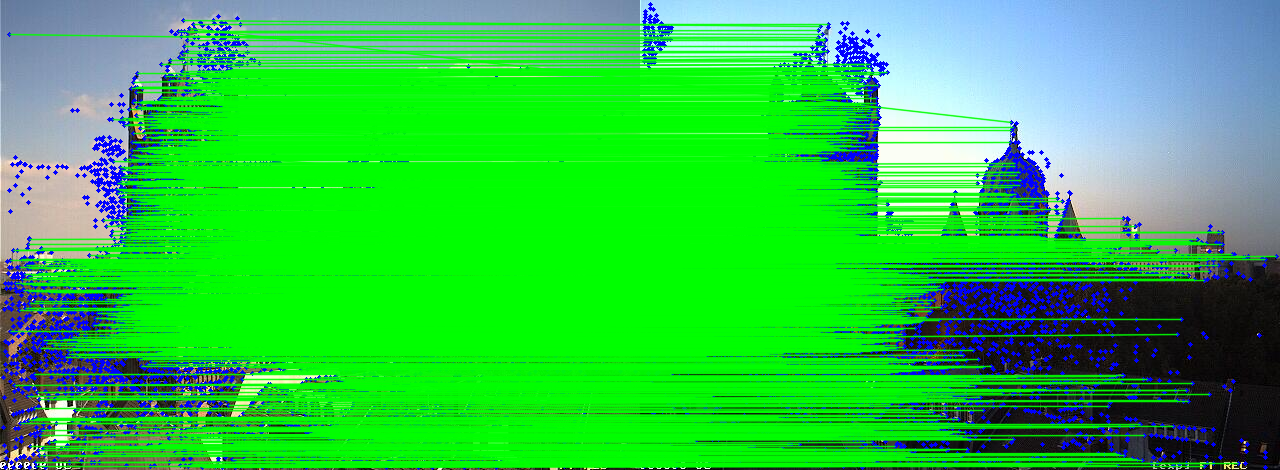

In [10]:
from IPython.display import Image, display

output_img_path = "output_match_final.png"

if os.path.exists(output_img_path):
    display(Image(filename=output_img_path))
else:
    print("No se encontró la imagen")
